# k-means algorithm and posterizing

We can use scikitlearn to calculate the kmeans pixels for us. However, we will have to use those pixels to posterize our image.

First consider writing a helper function `distance(p1, p2)` that finds the pythagorean distance between two points (lists).  

For example, if you have `p1=[a,b,c]` and `p2=[d,e,f]`, the function would return the distance $d$ between two points where
$$d = \sqrt{(d-a)^2 + (e-b)^2 + (f-c)^2}$$

In [1]:
# libraries!
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import utils
import cv2
import seaborn as sns
import numpy as np
sns.set(style="darkgrid")

In [2]:
def distance(p1, p2):
    """Pythagorean Distance between two points
       p1 and p2 must be lists of the same length"""
    
    if len(p1) != len(p2):
        print("[ERROR] Lists are not the same length")
        return 42
    
    distance = 0
    for i in range(len(p1)):
        distance += (p1[i]-p2[i])**2
        
    return distance**0.5

In [3]:
def posterize(IMAGE_NAME, NUM_MEANS):
    """Posterizes an image with specified number of means"""

    image = cv2.imread(IMAGE_NAME, cv2.IMREAD_COLOR)   # read image data
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)   # convert to RGB data

    # reshape the image to be a list of pixels
    image_pixels = image.reshape((image.shape[0] * image.shape[1], 3))
    new_image = image_pixels.copy()
    # print(image_pixels[0:10])
    
    # cluster pixels according to NUM_MEANS
    clusters = KMeans(n_clusters = NUM_MEANS)
    clusters.fit(image_pixels)

    # After the call to fit, the key information is contained in clusters.cluster_centers_ :
    count = 0
    centers = []
    for center in clusters.cluster_centers_:
        print("Center #", count, " == ", center)
        # note that the center's values are floats, not ints!
        center_integers = [int(p) for p in center]
        centers += [center_integers]
        print("   and as ints:", center_integers)
        count += 1
    
    # these lines...  convert from array to image
    new_image = np.asarray(new_image)
    new_image = np.reshape(new_image, (image.shape[0], image.shape[1], 3))

    # these lines... create a histogram of clusters  
    #       and a figure representing the number of pixels labeled to each color
    hist = utils.centroid_histogram(clusters)
    print('this hist is',hist)
    bar = utils.plot_colors(hist, clusters.cluster_centers_)

    return new_image, bar

Center # 0  ==  [171.86902525 215.93729558 217.34349485]
   and as ints: [171, 215, 217]
Center # 1  ==  [ 34.06680479 102.38641146 154.13184902]
   and as ints: [34, 102, 154]
Center # 2  ==  [171.49215562  35.53026035   5.47250826]
   and as ints: [171, 35, 5]
this hist is [0.48329253 0.35793735 0.15877012]
Starter code: running for 3 means


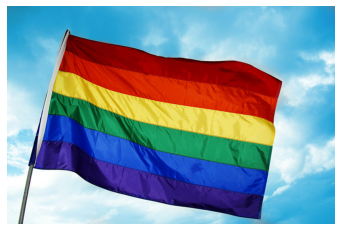

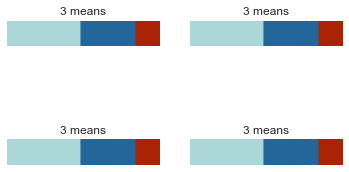

In [4]:
NUM_MEANS = 3
new_image, bar = posterize("flag.png", NUM_MEANS)

#
print(f"Starter code: running for {NUM_MEANS} means")

# in the first figure window, show our image
plt.figure()
plt.axis("off")
plt.imshow(new_image)

# in the second figure window, show the pixel histograms 
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False)
title = str(NUM_MEANS)+" means"
ax[0,0].imshow(bar);    ax[0,0].set_title(title)
ax[0,1].imshow(bar);    ax[0,1].set_title(title)
ax[1,0].imshow(bar);    ax[1,0].set_title(title)
ax[1,1].imshow(bar);    ax[1,1].set_title(title)
for row in range(2):
    for col in range(2):
        ax[row,col].axis('off')
plt.show(block=fig)


Center # 0  ==  [108.13976324  76.13784203  30.21994954]
   and as ints: [108, 76, 30]
Center # 1  ==  [29.748741   15.19157108 10.98267464]
   and as ints: [29, 15, 10]
Center # 2  ==  [188.57316841 145.8497682   53.55378857]
   and as ints: [188, 145, 53]
this hist is [0.21721809 0.56019291 0.222589  ]
Starter code: running for 3 means
Center # 0  ==  [68.09744556 43.40525858 20.84475349]
   and as ints: [68, 43, 20]
Center # 1  ==  [164.23375555 127.99566815  47.42071064]
   and as ints: [164, 127, 47]
Center # 2  ==  [23.8555223  10.92705159  9.52423881]
   and as ints: [23, 10, 9]
Center # 3  ==  [219.21554121 168.4844258   61.31435842]
   and as ints: [219, 168, 61]
Center # 4  ==  [119.66325806  84.4342423   31.81153245]
   and as ints: [119, 84, 31]
this hist is [0.17471038 0.15394766 0.46333957 0.08888552 0.11911688]
Center # 0  ==  [22.64190094 10.15587082  9.24065382]
   and as ints: [22, 10, 9]
Center # 1  ==  [174.59596933 145.48644031  58.67829135]
   and as ints: [174, 1

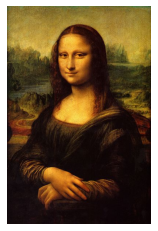

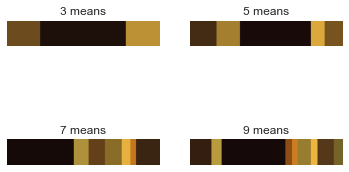

In [11]:
# PART A: RUNNING K-MEANS

NUM_MEANS = 3
new_image, bar = posterize("monalisa.jpg", NUM_MEANS)

print(f"Starter code: running for {NUM_MEANS} means")

plt.figure()
plt.axis("off")
plt.imshow(new_image)

fig, ax = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False)
title = str(NUM_MEANS)+" means"
ax[0,0].imshow(bar);    ax[0,0].set_title(title)

NUM_MEANS = 5
new_image, bar = posterize("monalisa.jpg", NUM_MEANS)
title = str(NUM_MEANS)+" means"
ax[0,1].imshow(bar);    ax[0,1].set_title(title)

NUM_MEANS = 7
new_image, bar = posterize("monalisa.jpg", NUM_MEANS)
title = str(NUM_MEANS)+" means"
ax[1,0].imshow(bar);    ax[1,0].set_title(title)

NUM_MEANS = 9
new_image, bar = posterize("monalisa.jpg", NUM_MEANS)
title = str(NUM_MEANS)+" means"
ax[1,1].imshow(bar);    ax[1,1].set_title(title)

for row in range(2):
    for col in range(2):
        ax[row,col].axis('off')
plt.show(block=fig)


Center # 0  ==  [78.88135593 57.66944821 49.00837352]
   and as ints: [78, 57, 49]
Center # 1  ==  [173.65015746 214.13024144 219.40701837]
   and as ints: [173, 214, 219]
Center # 2  ==  [164.5094619  128.46169083  97.33405131]
   and as ints: [164, 128, 97]
this hist is [0.14464167 0.63894583 0.2164125 ]
Starter code: running for 3 means
Center # 0  ==  [137.03138422  91.44861578  62.03676585]
   and as ints: [137, 91, 62]
Center # 1  ==  [132.11067138 198.91134112 212.53771398]
   and as ints: [132, 198, 212]
Center # 2  ==  [179.54494993 152.37710359 121.71573321]
   and as ints: [179, 152, 121]
Center # 3  ==  [188.55681199 221.03905179 224.50751357]
   and as ints: [188, 221, 224]
Center # 4  ==  [43.64947032 42.27311852 48.9123262 ]
   and as ints: [43, 42, 48]
this hist is [0.16129167 0.177875   0.14153333 0.4435     0.0758    ]
Center # 0  ==  [188.93815789 222.91721923 227.65557397]
   and as ints: [188, 222, 227]
Center # 1  ==  [122.34550611  77.44669304  50.66513778]
   an

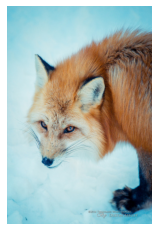

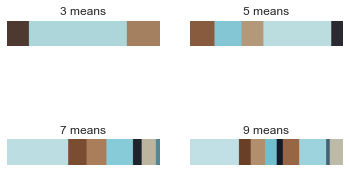

In [12]:
# PART A: RUNNING K-MEANS

NUM_MEANS = 3
new_image, bar = posterize("fox.jpg", NUM_MEANS)

print(f"Starter code: running for {NUM_MEANS} means")

plt.figure()
plt.axis("off")
plt.imshow(new_image)

fig, ax = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False)
title = str(NUM_MEANS)+" means"
ax[0,0].imshow(bar);    ax[0,0].set_title(title)

NUM_MEANS = 5
new_image, bar = posterize("fox.jpg", NUM_MEANS)
title = str(NUM_MEANS)+" means"
ax[0,1].imshow(bar);    ax[0,1].set_title(title)

NUM_MEANS = 7
new_image, bar = posterize("fox.jpg", NUM_MEANS)
title = str(NUM_MEANS)+" means"
ax[1,0].imshow(bar);    ax[1,0].set_title(title)

NUM_MEANS = 9
new_image, bar = posterize("fox.jpg", NUM_MEANS)
title = str(NUM_MEANS)+" means"
ax[1,1].imshow(bar);    ax[1,1].set_title(title)

for row in range(2):
    for col in range(2):
        ax[row,col].axis('off')
plt.show(block=fig)


In [8]:
# HELPER FUNCTION FOR PART B:

def find_closest(centers, pixel):
    smallest_dist = 99999999
    for i in centers:
        if distance(i, pixel) < smallest_dist:
            smallest_dist = distance(i, pixel)
            the_best = i
    return the_best

In [9]:
# PART B: POSTERIZING

def actual_posterize(IMAGE_NAME, NUM_MEANS):
    """Posterizes an image with specified number of means"""

    image = cv2.imread(IMAGE_NAME, cv2.IMREAD_COLOR)   # read image data
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)   # convert to RGB data

    # reshape the image to be a list of pixels
    image_pixels = image.reshape((image.shape[0] * image.shape[1], 3))
    new_image = image_pixels.copy()
    # print(image_pixels[0:10])
    
    # cluster pixels according to NUM_MEANS
    clusters = KMeans(n_clusters = NUM_MEANS)
    clusters.fit(image_pixels)

    # After the call to fit, the key information is contained in clusters.cluster_centers_ :
    count = 0
    centers = []
    for center in clusters.cluster_centers_:
        print("Center #", count, " == ", center)
        # note that the center's values are floats, not ints!
        center_integers = [int(p) for p in center]
        centers += [center_integers]
        print("   and as ints:", center_integers)
        count += 1
#     print('new_image is', new_image)
#     for row in range(len(new_image)):
#         for column in range(len(new_image[row])):
#             print('this is the one that is creating problems' ,new_image[row][column])

#             new_image[row][column] = find_closest(centers, new_image[row][column])
            
    for pixel in range(len(new_image)):
        new_image[pixel] = find_closest(centers, new_image[pixel])
        
    
    # these lines...  convert from array to image
    new_image = np.asarray(new_image)
    new_image = np.reshape(new_image, (image.shape[0], image.shape[1], 3))

    # these lines... create a histogram of clusters  
    #       and a figure representing the number of pixels labeled to each color
    hist = utils.centroid_histogram(clusters)
    print('this hist is',hist)
    bar = utils.plot_colors(hist, clusters.cluster_centers_)

    return new_image, bar

Center # 0  ==  [101.82136158 142.4162682   51.59345362]
   and as ints: [101, 142, 51]
Center # 1  ==  [172.9836504  174.45541846 167.71391236]
   and as ints: [172, 174, 167]
Center # 2  ==  [30.35607761 31.33541616 35.50326233]
   and as ints: [30, 31, 35]
Center # 3  ==  [87.22157131 65.91341267 71.49976526]
   and as ints: [87, 65, 71]
Center # 4  ==  [101.87531029 107.73217491 125.96211572]
   and as ints: [101, 107, 125]
this hist is [0.20196248 0.08783135 0.3084902  0.26154651 0.14016946]
Starter code: running for 5 means


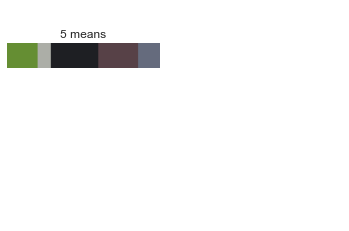

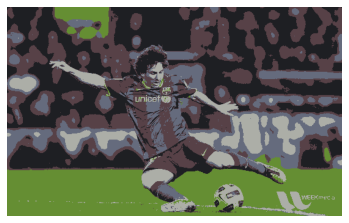

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False)

image = 'messi5.jpg'
NUM_MEANS = 5
new_image, bar = actual_posterize(image, NUM_MEANS)

print(f"Starter code: running for {NUM_MEANS} means")

plt.figure()
plt.axis("off")
plt.imshow(new_image)

title = str(NUM_MEANS) + " means"
ax[0,0].imshow(bar);    ax[0,0].set_title(title)
for row in range(2):
    for col in range(2):
        ax[row,col].axis('off')
plt.show(block=fig)


Center # 0  ==  [236.82261239 210.4429873  196.26369775]
   and as ints: [236, 210, 196]
Center # 1  ==  [ 84.34068295  63.62742829 187.42076846]
   and as ints: [84, 63, 187]
Center # 2  ==  [226.03879985 119.68853044  37.00741457]
   and as ints: [226, 119, 37]
Center # 3  ==  [103.70287438 172.02523027 167.54347308]
   and as ints: [103, 172, 167]
Center # 4  ==  [208.04763772 149.60704735 202.6472347 ]
   and as ints: [208, 149, 202]
Center # 5  ==  [59.65291157 41.02013109 52.35329724]
   and as ints: [59, 41, 52]
this hist is [0.20447625 0.15402391 0.14726766 0.08494229 0.31124708 0.09804281]
Starter code: running for 6 means


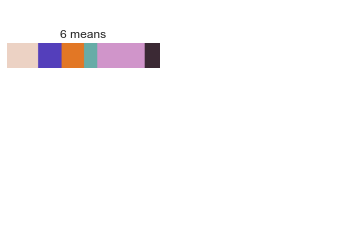

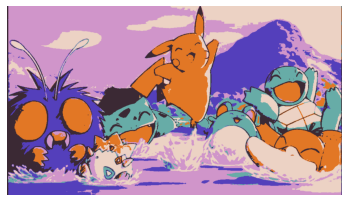

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False)

image = 'pokemon.jpg'
NUM_MEANS = 6
new_image, bar = actual_posterize(image, NUM_MEANS)

print(f"Starter code: running for {NUM_MEANS} means")

plt.figure()
plt.axis("off")
plt.imshow(new_image)

title = str(NUM_MEANS) + " means"
ax[0,0].imshow(bar);    ax[0,0].set_title(title)
for row in range(2):
    for col in range(2):
        ax[row,col].axis('off')
plt.show(block=fig)
